# Speech recognition using HMM

## MFCC extraction

In [10]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
from scipy.io import wavfile


In [2]:
# Dataset path
dataset_path = 'data/' 

# Create and view all possible targets
targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(targets)
print('alltargets: ',len(targets))

['apple', 'banana', 'kiwi', 'lime', 'orange', 'peach', 'pineapple']
alltargets:  7


In [3]:
# Only keep some specified words
words = ['apple', 'banana', 'kiwi', 'lime', 'orange', 'peach', 'pineapple']
targets = [a for a in words for b in targets if a == b]
print(targets)
print('targets selected: ',len(targets))

['apple', 'banana', 'kiwi', 'lime', 'orange', 'peach', 'pineapple']
targets selected:  7


In [4]:
# See how many samples are in each
num_samples = 0
for target in targets:
    print(target,' => ',len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

apple  =>  15
banana  =>  15
kiwi  =>  15
lime  =>  15
orange  =>  15
peach  =>  15
pineapple  =>  15
Total samples: 105


In [5]:
# Settings
target_list = targets
test_ratio = 0.33
num_mfcc = 20
win_len = 0.02
win_step = 0.01
#len_mfcc = 99 # 10 ms samples

In [6]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)
    print(target,' => label: ', index)

data/apple
apple  => label:  0
data/banana
banana  => label:  1
data/kiwi
kiwi  => label:  2
data/lime
lime  => label:  3
data/orange
orange  => label:  4
data/peach
peach  => label:  5
data/pineapple
pineapple  => label:  6


In [7]:
# Check Y vector
for item in y:
    print(len(item))

15
15
15
15
15
15
15


In [8]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]
print(len(y), len(filenames))

105 105


In [9]:
# check
print(filenames)
print(y)

['apple01.wav', 'apple02.wav', 'apple03.wav', 'apple04.wav', 'apple05.wav', 'apple06.wav', 'apple07.wav', 'apple08.wav', 'apple09.wav', 'apple10.wav', 'apple11.wav', 'apple12.wav', 'apple13.wav', 'apple14.wav', 'apple15.wav', 'banana01.wav', 'banana02.wav', 'banana03.wav', 'banana04.wav', 'banana05.wav', 'banana06.wav', 'banana07.wav', 'banana08.wav', 'banana09.wav', 'banana10.wav', 'banana11.wav', 'banana12.wav', 'banana13.wav', 'banana14.wav', 'banana15.wav', 'kiwi01.wav', 'kiwi02.wav', 'kiwi03.wav', 'kiwi04.wav', 'kiwi05.wav', 'kiwi06.wav', 'kiwi07.wav', 'kiwi08.wav', 'kiwi09.wav', 'kiwi10.wav', 'kiwi11.wav', 'kiwi12.wav', 'kiwi13.wav', 'kiwi14.wav', 'kiwi15.wav', 'lime01.wav', 'lime02.wav', 'lime03.wav', 'lime04.wav', 'lime05.wav', 'lime06.wav', 'lime07.wav', 'lime08.wav', 'lime09.wav', 'lime10.wav', 'lime11.wav', 'lime12.wav', 'lime13.wav', 'lime14.wav', 'lime15.wav', 'orange01.wav', 'orange02.wav', 'orange03.wav', 'orange04.wav', 'orange05.wav', 'orange06.wav', 'orange07.wav', 'o

In [11]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    fs, signal = wavfile.read(path)
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=win_len,
                                            winstep=win_step,
                                            numcep=num_mfcc,
                                            winfunc=np.hanning)

    return mfccs.transpose()

In [12]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        #if mfccs.shape[1] == len_mfcc:
        out_x.append(mfccs)
        out_y.append(in_y[index])
        #else:
        print('shape:', index, mfccs.shape)
        prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [13]:
# extract features into sets
len_y_orig = len(y)
print(len_y_orig)
x, y, prob = extract_features(filenames, y)
print('Removed percentage:', prob / len_y_orig)


105
shape: 0 (20, 33)
shape: 1 (20, 40)
shape: 2 (20, 37)
shape: 3 (20, 39)
shape: 4 (20, 40)
shape: 5 (20, 35)
shape: 6 (20, 39)
shape: 7 (20, 45)
shape: 8 (20, 42)
shape: 9 (20, 42)
shape: 10 (20, 44)
shape: 11 (20, 44)
shape: 12 (20, 44)
shape: 13 (20, 41)
shape: 14 (20, 42)
shape: 15 (20, 42)
shape: 16 (20, 46)
shape: 17 (20, 48)
shape: 18 (20, 44)
shape: 19 (20, 53)
shape: 20 (20, 54)
shape: 21 (20, 55)
shape: 22 (20, 52)
shape: 23 (20, 46)
shape: 24 (20, 54)
shape: 25 (20, 52)
shape: 26 (20, 51)
shape: 27 (20, 58)
shape: 28 (20, 58)
shape: 29 (20, 53)
shape: 30 (20, 41)
shape: 31 (20, 37)
shape: 32 (20, 38)
shape: 33 (20, 35)
shape: 34 (20, 38)
shape: 35 (20, 39)
shape: 36 (20, 42)
shape: 37 (20, 39)
shape: 38 (20, 38)
shape: 39 (20, 39)
shape: 40 (20, 41)
shape: 41 (20, 44)
shape: 42 (20, 44)
shape: 43 (20, 44)
shape: 44 (20, 45)
shape: 45 (20, 46)
shape: 46 (20, 41)
shape: 47 (20, 47)
shape: 48 (20, 46)
shape: 49 (20, 47)
shape: 50 (20, 44)
shape: 51 (20, 42)
shape: 52 (20, 40)

In [14]:
# check x and y vectors
print(len(x), len(y))
print(x)
print(y)

105 105
[array([[ 1.60494287e+01,  1.77168291e+01,  2.00614752e+01,
         1.97826391e+01,  2.03560669e+01,  2.06371745e+01,
         2.06693718e+01,  1.94776966e+01,  1.84512526e+01,
         1.67214531e+01,  1.64342042e+01,  1.66593494e+01,
         1.62180445e+01,  1.65785808e+01,  1.66402766e+01,
         1.70665923e+01,  1.60056936e+01,  1.63919597e+01,
         1.67165143e+01,  1.70208405e+01,  1.75473895e+01,
         1.82050735e+01,  1.84371376e+01,  1.83555525e+01,
         1.84718565e+01,  1.84967265e+01,  1.71733622e+01,
         1.76547357e+01,  1.54190334e+01,  1.50190933e+01,
         1.65701323e+01,  1.50300061e+01,  1.50654579e+01],
       [-2.65705047e+01, -2.39843626e+01, -3.33263386e+01,
        -2.54831422e+01, -2.93861177e+01, -2.62321510e+01,
        -2.85621226e+01, -2.09480813e+01, -3.31631400e+00,
        -7.66752776e+00, -1.05683775e+01, -1.32008745e+01,
        -1.51417593e+01, -1.05072378e+01, -1.15254211e+01,
        -1.79790198e+01, -1.46827035e+01, -1.7

In [15]:
# view final number of samples
for index, target in enumerate(target_list):
    print("target:", target)
    print("label:", index)
    print("number of samples:", y.count(index))
    print("===============================================")

target: apple
label: 0
number of samples: 15
target: banana
label: 1
number of samples: 15
target: kiwi
label: 2
number of samples: 15
target: lime
label: 3
number of samples: 15
target: orange
label: 4
number of samples: 15
target: peach
label: 5
number of samples: 15
target: pineapple
label: 6
number of samples: 15


MFCCs: [[ 16.96975299  16.14956301  16.12022353 ...  11.97755949  11.72547847
   11.76164106]
 [-15.43920102 -12.98564194 -19.33256038 ...   2.97335114  -0.28225023
    1.30015601]
 [-31.2252009  -20.92346796 -25.12184208 ... -21.76183155 -17.48920593
  -20.96708944]
 ...
 [ -3.76735196   1.12022765  -2.19053434 ...  -3.87420497   3.24937794
   -5.76767563]
 [  2.84254401  -3.38571403  -0.16901451 ...  -7.63190754 -12.03643232
   -6.87075591]
 [ -0.38888493   1.910196    -2.09820598 ...  -4.12109884   0.54422306
    2.09106164]]
pineapple


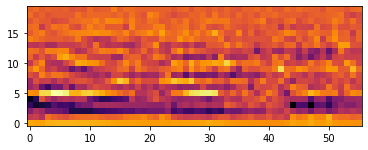

In [16]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 104

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y[idx])], 
            filenames[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y[idx])])
playsound(path)

In [17]:
# Split MFFCC coefficients into random train and test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print("Train files : ",len(x_train))
print("Test files : ", len(x_test))

Train files :  70
Test files :  35


In [18]:
print(x_test)

[array([[ 1.28023810e+01,  1.25386765e+01,  1.24253193e+01,
         1.25837527e+01,  1.68230318e+01,  1.55093735e+01,
         1.63518744e+01,  1.61990788e+01,  1.72137653e+01,
         1.66930612e+01,  1.58729179e+01,  1.59105792e+01,
         1.57223878e+01,  1.60559889e+01,  1.60725931e+01,
         1.63853104e+01,  1.63883456e+01,  1.66736134e+01,
         1.72844609e+01,  1.69802926e+01,  1.71186304e+01,
         1.72944858e+01,  1.66799186e+01,  1.56794093e+01,
         1.49900555e+01,  1.45634821e+01,  1.47145406e+01,
         1.42282941e+01,  1.48495096e+01,  1.60293026e+01,
         1.66414021e+01,  1.62693140e+01,  1.61905988e+01,
         1.62123804e+01,  1.61108950e+01,  1.45342846e+01,
         1.50470396e+01,  1.36236338e+01,  1.38190171e+01,
         1.30192171e+01,  1.45597231e+01],
       [-5.67725918e+00, -5.34372695e+00, -9.75385170e+00,
        -1.28357352e+01, -2.70153981e+01, -2.33662537e+01,
        -2.83383410e+01, -2.59309776e+01, -3.36914037e+01,
        -2.6

In [19]:
print(y_test)

[2.0, 4.0, 4.0, 3.0, 3.0, 6.0, 6.0, 3.0, 0.0, 0.0, 1.0, 2.0, 5.0, 6.0, 5.0, 0.0, 5.0, 2.0, 0.0, 1.0, 6.0, 3.0, 1.0, 5.0, 2.0, 4.0, 1.0, 2.0, 2.0, 0.0, 5.0, 0.0, 6.0, 5.0, 1.0]


In [20]:
print(x_train[0].shape)
print(x_test[0].shape)
print(len(y_train))
print(len(y_test))

(20, 68)
(20, 41)
70
35


## HMM

In [21]:
from hmmlearn import hmm

# Class to handle HMM processing(Python-Machine-Learning-Cookbook)
class HMMTrainer(object):
    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components,
                    covariance_type=self.cov_type, n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type')

    # X is a 2D numpy array where each row is 16D
    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))#Feature matrix of individual samples.

    # Run the model on input data
    def get_score(self, input_data):
        return self.model.score(input_data)

#### Train HMM models

In [22]:
X = [np.array([]) for i in range(0, len(words))]
lengths = [0 for i in range(0, len(words))]

# Iterate through the y_train
for i in range(len(y_train)):

    # Extract the label
    label = int(y_train[i])
    
    lengths[label] += 1
    
    # Extract MFCC features
    mfcc_features = x_train[i]
            
    # Append to the variable X
    if len(X[label]) == 0:
        X[label] = mfcc_features.T
    else:
        X[label] = np.append(X[label], mfcc_features.T, axis=0)

In [23]:
print(X[0].shape)
print(X[1].shape)
print(X[6].shape)

(360, 20)
(519, 20)
(578, 20)


In [24]:
print(lengths)

[9, 10, 9, 11, 12, 9, 10]


In [25]:
hmm_models = []# 1 modelo por cada label (palabra)

for label in range(len(X)):
    word = words[label]
    print('training word:', word, X[label].shape)

    # Train and save HMM model
    hmm_trainer = HMMTrainer()
    hmm_trainer.train(X[label])
    hmm_models.append((hmm_trainer, label, word))
    hmm_trainer = None

training word: apple (360, 20)
training word: banana (519, 20)
training word: kiwi (361, 20)
training word: lime (470, 20)
training word: orange (936, 20)
training word: peach (583, 20)
training word: pineapple (578, 20)


#### Test

In [26]:
y_pred = np.array([])
# Iterate through the y_test
for i in range(len(y_test)):
    

    # Extract the label and view the word
    test_label = int(y_test[i])
    test_word = words[test_label]
    
    # Extract MFCC features
    mfcc_features = x_test[i]

    # Define variables
    max_score = float('-inf')
    output_label = None
    output_word = word
    lengths_in = [99]
    
    # Iterate through all HMM models and pick
    # the one with the highest score
    for item in hmm_models:
        hmm_model, label, word = item
        score = hmm_model.get_score(mfcc_features.T)
        #print(score)
        if score > max_score:
            max_score = score
            output_label = label
            output_word = word
            
    y_pred = np.append(y_pred, output_label)
    # Print the outpu
    #print("Word Test:", test_label, test_word)
    #print("Word Predicted:", output_label, output_word)#, max_score)
    #print("================================")

In [27]:
print(len(y_pred), len(y_test))

35 35


In [28]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred)*100 )
print('Report : ')
print(classification_report(y_test, y_pred, target_names= words))

Confusion Matrix :
[[6 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 6 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 6 0]
 [0 0 0 0 0 0 5]]
Accuracy Score : 100.0
Report : 
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         6
      banana       1.00      1.00      1.00         5
        kiwi       1.00      1.00      1.00         6
        lime       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         3
       peach       1.00      1.00      1.00         6
   pineapple       1.00      1.00      1.00         5

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

